In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan_df = pd.read_csv(r"C:\Users\aryan\Downloads\data\data\loan.csv")

In [3]:
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [4]:
Applicant_df = pd.read_csv(r"C:\Users\aryan\Downloads\data\data\applicant.csv")

In [5]:
Applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


### Task  Doing Exploratory Data Analysis & share the insights.

In [6]:
loan_df.describe()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


### Crosstab relationship between the two

In [7]:
pd.crosstab(loan_df['Number_of_existing_loans_at_this_bank'], loan_df['high_risk_applicant'], margins=True)

high_risk_applicant,0,1,All
Number_of_existing_loans_at_this_bank,,,
1,433,200,633
2,241,92,333
3,22,6,28
4,4,2,6
All,700,300,1000


### Merging the two dataframes

In [8]:
df= pd.merge(loan_df,Applicant_df,on="applicant_id", how="outer")

In [9]:
df.loc[:,"Telephone"]

0      Registered under the applicant's name
1                                        NaN
2                                        NaN
3                                        NaN
4                                        NaN
                       ...                  
995                                      NaN
996    Registered under the applicant's name
997                                      NaN
998    Registered under the applicant's name
999                                      NaN
Name: Telephone, Length: 1000, dtype: object

### Removing non essential columns

In [10]:
new_df = df.drop(['Other_EMI_plans', 'Telephone', 'Has_been_employed_for_at_most', 'Foreign_worker','loan_application_id'], axis=1)

### Checking null values

In [11]:
new_df.isnull().sum()

applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                 

### Handling the missing values

In [12]:
new_df['Purpose'].fillna(df['Purpose'].mode()[0],inplace=True)
new_df['Property'].fillna(df['Property'].mode()[0],inplace=True)
new_df['Has_been_employed_for_at_least'].fillna(df['Has_been_employed_for_at_least'].mode()[0],inplace=True)
new_df['Savings_account_balance'].fillna(df['Savings_account_balance'].mode()[0],inplace=True)
new_df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].fillna(df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].mode()[0],inplace=True)
new_df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].fillna(df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].mode()[0],inplace=True)

In [13]:
new_df.isnull().sum()

applicant_id                                                0
Months_loan_taken_for                                       0
Purpose                                                     0
Principal_loan_amount                                       0
EMI_rate_in_percentage_of_disposable_income                 0
Property                                                    0
Has_coapplicant                                             0
Has_guarantor                                               0
Number_of_existing_loans_at_this_bank                       0
Loan_history                                                0
high_risk_applicant                                         0
Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing                                                     0
Years_at

### Histogram of Target Risk_Applicants

<AxesSubplot:>

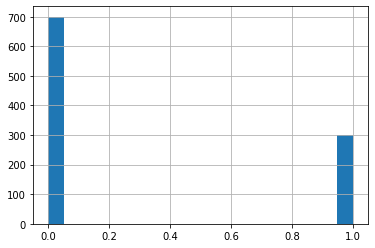

In [14]:
new_df['high_risk_applicant'].hist(bins=20)

<AxesSubplot:xlabel='Principal_loan_amount', ylabel='Balance_in_existing_bank_account_(lower_limit_of_bucket)'>

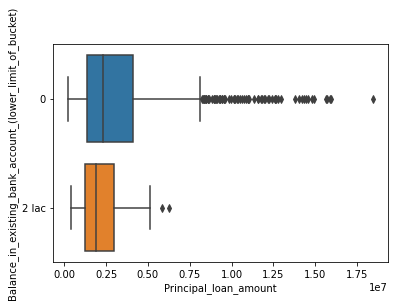

In [15]:
sns.boxplot(x='Principal_loan_amount',y='Balance_in_existing_bank_account_(lower_limit_of_bucket)',data=new_df)

<AxesSubplot:>

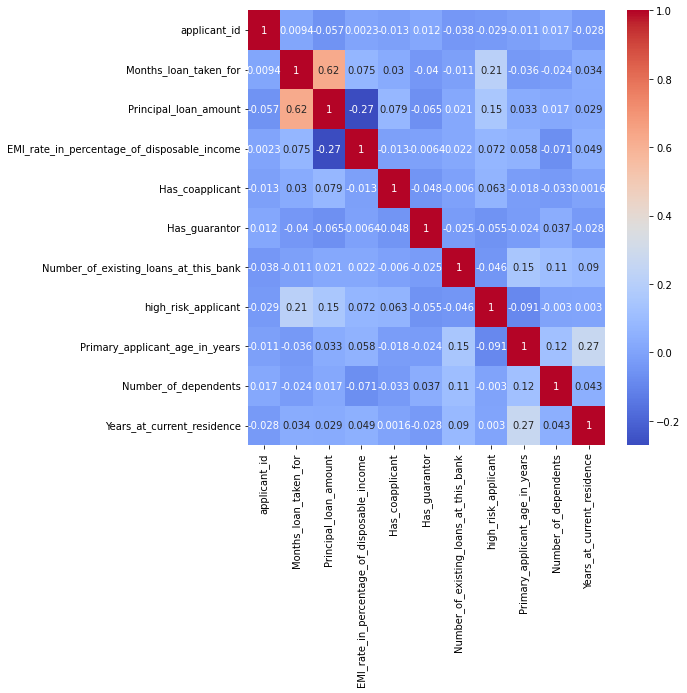

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(),annot=True, cmap="coolwarm")

In [16]:
new_df.head()

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,...,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,...,male,single,1,own,4,skilled employee / official,7 years,Low,0,0
1,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,...,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,Low,0,2 lac
2,1432761,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,...,male,single,2,own,3,unskilled - resident,4 years,Low,0,0
3,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,...,male,single,2,for free,4,skilled employee / official,4 years,Low,0,0
4,1674436,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,...,male,single,2,for free,4,skilled employee / official,1 year,Low,0,0


In [17]:
df_2 = new_df.drop(['Has_coapplicant', 'Has_guarantor',], axis=1)


### TASK - Segmenting Customers ordered by Their Risk (of default)

In [18]:
df_2.sort_values(by=['high_risk_applicant'])

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,6,electronic equipment,1169000,4,real estate,2,critical/pending loans at other banks,0,67,male,single,1,own,4,skilled employee / official,7 years,Low,0,0
604,1462065,10,FF&E,1275000,4,building society savings agreement/life insurance,1,existing loans paid back duly till now,0,23,female,divorced/separated/married,1,own,2,skilled employee / official,0 year,Low,2 lac,0
605,1474361,24,FF&E,2828000,4,real estate,1,all loans at this bank paid back duly,0,22,male,single,1,own,4,skilled employee / official,1 year,High,0,0
606,1764990,24,business,4526000,3,real estate,1,critical/pending loans at other banks,0,74,male,single,1,own,2,management / self-employed / highly qualified ...,1 year,Low,0,0
608,1365958,18,electronic equipment,2051000,4,real estate,1,existing loans paid back duly till now,0,33,male,single,1,own,1,skilled employee / official,0 year,Low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1234944,12,electronic equipment,1534000,1,real estate,1,existing loans paid back duly till now,1,23,male,married/widowed,1,rent,1,skilled employee / official,0 year,Low,0,2 lac
180,1351247,36,business,9572000,1,car or other,2,delay in paying off loans in the past,1,28,male,divorced/separated,1,own,1,skilled employee / official,0 year,Low,0,0
181,1324848,36,business,4455000,2,real estate,2,delay in paying off loans in the past,1,30,male,divorced/separated,1,own,2,management / self-employed / highly qualified ...,1 year,Low,0,2 lac
751,1612689,18,new vehicle,976000,1,car or other,1,existing loans paid back duly till now,1,23,female,divorced/separated/married,1,own,2,unskilled - resident,0 year,Low,0,0


In [19]:
column_headers = list(df_2.columns.values)
column_headers

['applicant_id',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history',
 'high_risk_applicant',
 'Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)']

In [20]:

Target = df_2.drop(['high_risk_applicant'], axis=1)
df_2 = df_2.drop(['applicant_id',], axis=1)

In [21]:
column_headers = list(df_2.columns.values)
column_headers

['Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history',
 'high_risk_applicant',
 'Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)']

### Handling Categorical variable

In [22]:
print(set(df_2['Purpose'].values.tolist()))
print(set(df_2['Gender'].values.tolist()))
print(set(df_2['Property'].values.tolist()))
print(set(df_2['Loan_history'].values.tolist()))
print(set(df_2['Marital_status'].values.tolist()))
print(set(df_2['Housing'].values.tolist()))
print(set(df_2['Employment_status'].values.tolist()))
print(set(df_2['Has_been_employed_for_at_least'].values.tolist()))
print(set(df_2['Savings_account_balance'].values.tolist()))

{'used vehicle', 'domestic appliances', 'FF&E', 'education', 'electronic equipment', 'business', 'career development', 'repair costs', 'new vehicle'}
{'female', 'male'}
{'real estate', 'car or other', 'building society savings agreement/life insurance'}
{'no loans taken/all loans paid back duly', 'existing loans paid back duly till now', 'critical/pending loans at other banks', 'all loans at this bank paid back duly', 'delay in paying off loans in the past'}
{'single', 'divorced/separated/married', 'divorced/separated', 'married/widowed'}
{'for free', 'rent', 'own'}
{'unemployed / unskilled - non-resident', 'management / self-employed / highly qualified employee / officer', 'unskilled - resident', 'skilled employee / official'}
{'4 years', '7 years', '1 year', '0 year'}
{'Medium', 'Low', 'Very high', 'High'}


In [23]:

df_2['Balance_in_existing_bank_account_(upper_limit_of_bucket)']= df_2['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].map({'0':0,'2 lac':1}).astype(int)

df_2['Balance_in_existing_bank_account_(lower_limit_of_bucket)']= df_2['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].map({'0':0,'2 lac':1}).astype(int)

df_2 = pd.get_dummies(df_2,columns = ['Gender', 'Purpose','Marital_status','Property','Loan_history'
                                          ,'Housing','Employment_status','Savings_account_balance','Loan_history','Has_been_employed_for_at_least'])



In [24]:
matrix = np.corrcoef(df_2)
print(matrix)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [ ]:
df_2.head()

In [ ]:
#df_2.to_csv(r'C:\Users\aryan\Downloads\data\df.csv')

